In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from time import sleep
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('doitall.csv')

In [3]:
df

,Unnamed: 0,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,"New Person, Same Old Mistakes",Tame Impala,spotify:track:52ojopYMUzeNcudsoz7O9D,0.752,0.533,-8.986,0.0347,0.1490,0.000051,0.114,0.461,114.985
1,1,I Was Never There,The Weeknd,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.729,0.552,-12.220,0.3660,0.8000,0.002220,0.109,0.637,97.923
2,2,Under,Sampha,spotify:track:4NymlHYXIzso0S1TPWUSid,0.400,0.650,-6.104,0.0466,0.0118,0.000076,0.791,0.150,107.989
3,3,All I Have - Intro,Snoh Aalegra,spotify:track:6iBWuaPa61mWphAvACYlDr,0.656,0.330,-8.771,0.1620,0.8180,0.003860,0.107,0.349,119.057
4,4,Pyramids,Frank Ocean,spotify:track:4QhWbupniDd44EDtnh2bFJ,0.590,0.602,-8.195,0.4130,0.5770,0.000007,0.643,0.720,121.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25217,25217,Give You My Heart - Kronkz Remix,Averion,spotify:track:0AsS4lfLELjYrgtZfNEZgW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25218,25218,Give You My Heart - Erry El Remix,Averion,spotify:track:3pPS775XVHIIJi74qFSvqo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25219,25219,Give You My Heart - Uvique Remix,Averion,spotify:track:5hCZllZ17DPJMeLscqyLho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25220,25220,Falling,Unsenses,spotify:track:5qBGvntJjNBAewZ46wJ0nI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,"New Person, Same Old Mistakes",Tame Impala,spotify:track:52ojopYMUzeNcudsoz7O9D,0.752,0.533,-8.986,0.0347,0.1490,0.000051,0.114,0.461,114.985
1,I Was Never There,The Weeknd,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.729,0.552,-12.220,0.3660,0.8000,0.002220,0.109,0.637,97.923
2,Under,Sampha,spotify:track:4NymlHYXIzso0S1TPWUSid,0.400,0.650,-6.104,0.0466,0.0118,0.000076,0.791,0.150,107.989
3,All I Have - Intro,Snoh Aalegra,spotify:track:6iBWuaPa61mWphAvACYlDr,0.656,0.330,-8.771,0.1620,0.8180,0.003860,0.107,0.349,119.057
4,Pyramids,Frank Ocean,spotify:track:4QhWbupniDd44EDtnh2bFJ,0.590,0.602,-8.195,0.4130,0.5770,0.000007,0.643,0.720,121.986
...,...,...,...,...,...,...,...,...,...,...,...,...
25217,Give You My Heart - Kronkz Remix,Averion,spotify:track:0AsS4lfLELjYrgtZfNEZgW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25218,Give You My Heart - Erry El Remix,Averion,spotify:track:3pPS775XVHIIJi74qFSvqo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25219,Give You My Heart - Uvique Remix,Averion,spotify:track:5hCZllZ17DPJMeLscqyLho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25220,Falling,Unsenses,spotify:track:5qBGvntJjNBAewZ46wJ0nI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
features = df[['danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 
                      'valence', 'tempo']]

In [7]:
features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.752,0.533,-8.986,0.0347,0.1490,0.000051,0.114,0.461,114.985
1,0.729,0.552,-12.220,0.3660,0.8000,0.002220,0.109,0.637,97.923
2,0.400,0.650,-6.104,0.0466,0.0118,0.000076,0.791,0.150,107.989
3,0.656,0.330,-8.771,0.1620,0.8180,0.003860,0.107,0.349,119.057
4,0.590,0.602,-8.195,0.4130,0.5770,0.000007,0.643,0.720,121.986
...,...,...,...,...,...,...,...,...,...
25217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
features.isna().sum()

danceability        52
energy              52
loudness            52
speechiness         52
acousticness        52
instrumentalness    52
liveness            52
valence             52
tempo               52
dtype: int64

In [9]:
# drop NaN values -> k means does not accept NaN values

features = features.dropna()

In [10]:
features.isna().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [11]:
scaler = StandardScaler().fit(features)
X_prep = StandardScaler().fit_transform(features)

In [12]:
# give all features the same weight, to make results more precise
pd.DataFrame(X_prep,columns=features.columns).head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.222242,-0.967390,-0.657283,-0.610792,-0.072316,-0.515965,-0.588281,0.117122,-0.487732
1,1.074108,-0.877151,-1.521767,3.358354,2.497201,-0.508481,-0.618243,0.852174,-1.092667
2,-1.044851,-0.411707,0.113108,-0.468224,-0.613848,-0.515879,3.468503,-1.181748,-0.735776
3,0.603944,-1.931523,-0.599811,0.914328,2.568248,-0.502821,-0.630227,-0.350638,-0.343358
4,0.178864,-0.639680,-0.445840,3.921438,1.617013,-0.516119,2.581643,1.198818,-0.239510


In [13]:
#saving the scaler for song reccomender
pickle.dump(scaler, open('scaler.pkl', 'wb'))

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

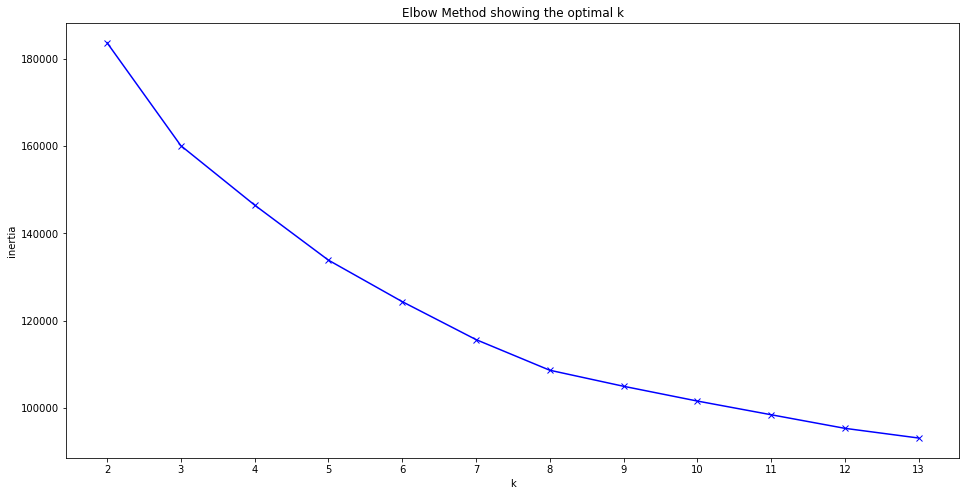

In [14]:
#First I tried the range 2-20 but couldn't see elbow so I narrowed the range to 2-14
#elbow method shows 8 clusters as optimal for given set

K = range(2, 14)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# optimal k is 8

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

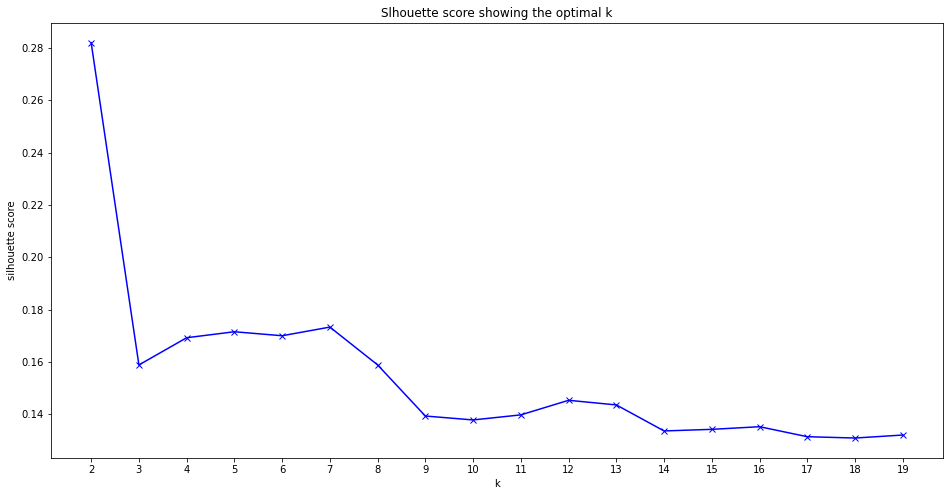

In [15]:
# started with range 2-20, but narrowed it down
# Silhouette Score shows optimal k of 

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

# optimal number of clusters are 7 

In [16]:
#Choosing 8 clusters

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    5666
1    4934
2    2650
3    5140
4    1710
5    2726
6    1545
7     799
dtype: int64

In [17]:
#Saving the model
pickle.dump(kmeans, open('model.pkl', 'wb'))

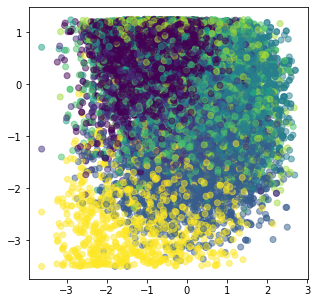

In [18]:
# kmeans = cluster.KMeans(n_clusters=8)
# kmeans.fit(X_prep)
# pred = kmeans.predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.5)
plt.show()

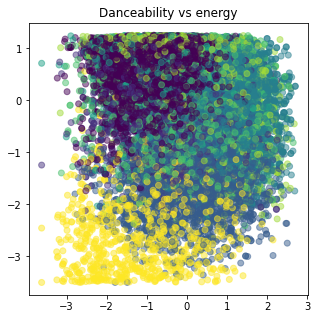

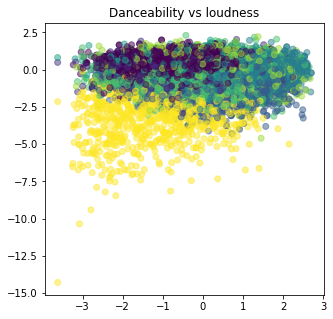

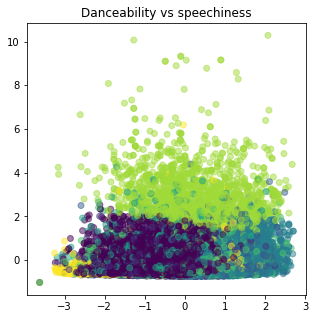

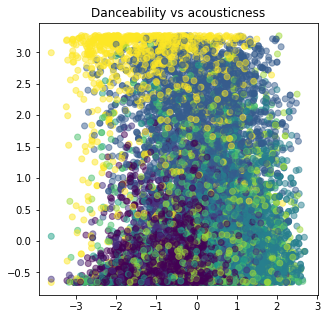

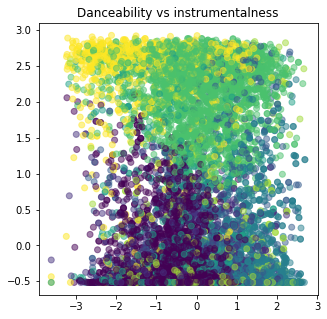

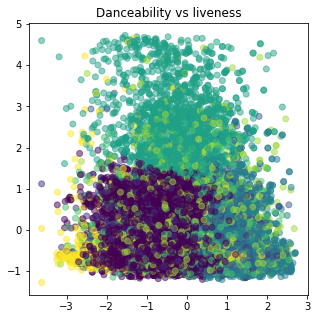

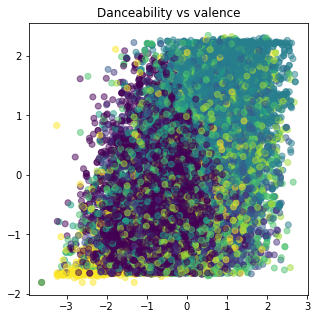

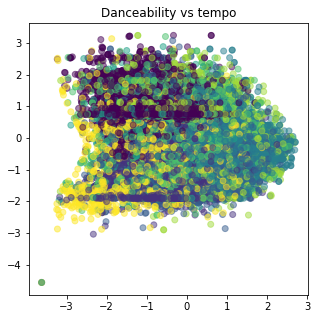

In [19]:
#Loop for plotting first(0) column with all the rest starting from energy
for i in range(1,len(features.columns)):    
    plt.figure(figsize=(5, 5))
    plt.scatter(X_prep[:, 0], X_prep[:, i], c=clusters,alpha=0.5)
    plt.title(f'Danceability vs {features.columns[i]}')
    plt.show()

In [20]:
# #Plotting just first(0) and second column(1) to visualize
# plt.figure(figsize=(5, 5))
# plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.5)
# plt.show()

In [21]:
df.isna().sum()


song                 2
artist               2
uri                  0
danceability        52
energy              52
loudness            52
speechiness         52
acousticness        52
instrumentalness    52
liveness            52
valence             52
tempo               52
dtype: int64

In [30]:
df = df.dropna(subset=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'instrumentalness', 'liveness', 'valence', 'tempo'])


In [31]:
df

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,"New Person, Same Old Mistakes",Tame Impala,spotify:track:52ojopYMUzeNcudsoz7O9D,0.752,0.533,-8.986,0.0347,0.14900,0.000051,0.114,0.461,114.985
1,I Was Never There,The Weeknd,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.729,0.552,-12.220,0.3660,0.80000,0.002220,0.109,0.637,97.923
2,Under,Sampha,spotify:track:4NymlHYXIzso0S1TPWUSid,0.400,0.650,-6.104,0.0466,0.01180,0.000076,0.791,0.150,107.989
3,All I Have - Intro,Snoh Aalegra,spotify:track:6iBWuaPa61mWphAvACYlDr,0.656,0.330,-8.771,0.1620,0.81800,0.003860,0.107,0.349,119.057
4,Pyramids,Frank Ocean,spotify:track:4QhWbupniDd44EDtnh2bFJ,0.590,0.602,-8.195,0.4130,0.57700,0.000007,0.643,0.720,121.986
...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Journey,Sephyx,spotify:track:3nGNMwgnwu2QBOZVltU8ho,0.534,0.751,-5.420,0.1110,0.14800,0.000358,0.129,0.336,149.935
25166,Higher,Sephyx,spotify:track:1a3Ug0R6JkDQqizk6NAU2L,0.449,0.847,-5.116,0.0558,0.00379,0.000435,0.595,0.269,169.968
25167,Crash 'N Burn,Proto Bytez,spotify:track:1qsudgxCMdpuhTCEoAe283,0.440,0.700,-7.382,0.0336,0.00446,0.000103,0.143,0.205,150.062
25168,Come Back,Proto Bytez,spotify:track:3c409FB9DP61m3WHwuVtDW,0.428,0.751,-6.297,0.0436,0.02750,0.011400,0.350,0.197,150.034


In [32]:
df['cluster'] = clusters

In [34]:
#Filter all cluster 0

df[df['cluster'] == 0]

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
34,John Redcorn,SiR,spotify:track:5ibTi2YwtvbB1bTOv2I93d,0.460,0.686,-5.948,0.0367,0.00146,0.000000,0.3750,0.2520,148.054,0
42,911 / Mr. Lonely (feat. Frank Ocean & Steve Lacy),"Tyler, The Creator",spotify:track:4bEcoz1OcfMgUbp2ft8ieQ,0.550,0.596,-8.214,0.1340,0.16200,0.004810,0.0805,0.2530,165.736,0
51,infinity (888) - feat. Joey Bada$$,XXXTENTACION,spotify:track:7J2gyNghNTzl4EsLhXp01Q,0.367,0.613,-5.646,0.0297,0.05080,0.001710,0.2820,0.0966,153.978,0
70,Poison,Brent Faiyaz,spotify:track:5NijSs5dAwaIybq1GaRTIe,0.381,0.502,-5.505,0.0368,0.16000,0.000070,0.0842,0.1470,144.300,0
105,Master of None,Beach House,spotify:track:3stWWPN41byqp8loPdy92u,0.307,0.625,-8.983,0.0620,0.47200,0.000577,0.1440,0.1830,180.467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25163,Letting You Go,Degos & Re-Done,spotify:track:0fQC9WJf9cZF3YqEERKOAb,0.539,0.821,-4.808,0.0562,0.05470,0.011600,0.0676,0.4480,149.900,0
25164,My Life,Degos & Re-Done,spotify:track:0gSpRrNArrvwtY7cGbA8fG,0.491,0.753,-5.512,0.0302,0.04660,0.000000,0.0915,0.2130,149.999,0
25165,Journey,Sephyx,spotify:track:3nGNMwgnwu2QBOZVltU8ho,0.534,0.751,-5.420,0.1110,0.14800,0.000358,0.1290,0.3360,149.935,0
25167,Crash 'N Burn,Proto Bytez,spotify:track:1qsudgxCMdpuhTCEoAe283,0.440,0.700,-7.382,0.0336,0.00446,0.000103,0.1430,0.2050,150.062,0


In [ ]:
# kmeans = cluster.KMeans(n_clusters=7)
# kmeans.fit(X_prep)
# pred = kmeans.predict(X_prep)

# plt.figure(figsize=(5, 5))
# plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
# plt.show()

In [35]:
df.to_csv('df_clustered.csv')